In [1]:
# importing basic libraries
import sqlite3
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sql_database = sqlite3.connect('database.sqlite')
df= pd.read_sql_query("SELECT * FROM Player_Attributes", sql_database)

In [3]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
df.shape

(183978, 42)

In [5]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [6]:
df.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [8]:
#there are three categorical columns

In [9]:
# We can drop the id ,date,player_fifa_api_id and player_api_id  column from the dataset
df.drop(columns=['id','date','player_fifa_api_id','player_api_id'],axis=1,inplace=True)

In [10]:
print(df['preferred_foot'].value_counts())
print(df['preferred_foot'].isna().sum())

right    138409
left      44733
Name: preferred_foot, dtype: int64
836


In [11]:
print(df['defensive_work_rate'].value_counts())
print(df['defensive_work_rate'].isna().sum())

medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
0            197
6            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64
836


In [12]:
# defensive_work_rate column contains so many irrelevant data , so it needs to be cleaned
def defensive_work_rate(cols):
    i = cols[0]
    
    if not pd.isnull(i):

        if i=='1' or i==1 or i=='2' or i==2 or i=='3' or i==3 or i=='_0' or i=='o' or i=='0' or i==0:
            return 'low'

        elif i=='4' or i==4 or i=='5' or i==5 or i=='es' or i=='ean' or i=='tocky' or i=='ormal':
            return 'medium'

        else:
            return 'high'

    elif pd.isnull(i):
        return 'medium'
    else:
        return i

In [13]:
df['defensive_work_rate'] = df[['defensive_work_rate']].apply(defensive_work_rate,axis=1)

In [14]:
df.defensive_work_rate.value_counts()

high      176963
low         5182
medium      1833
Name: defensive_work_rate, dtype: int64

In [15]:
df.defensive_work_rate.isna().sum()

0

In [16]:
print(df['attacking_work_rate'].value_counts())
print(df['attacking_work_rate'].isna().sum())

medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64
3230


In [17]:
# attacking_work_rate also needs to be cleaned
def attacking_work_rate(cols):
    i = cols[0]
    
    if not pd.isnull(i):

        if i=='y':
            return 'low'

        elif i=='norm':
            return 'medium'

        else:
            return 'high'

    elif pd.isnull(i):
        return 'medium'
    else:
        return i    

In [18]:
df['attacking_work_rate'] = df[['attacking_work_rate']].apply(attacking_work_rate,axis=1)

In [19]:
df.attacking_work_rate.value_counts()

high      180294
medium      3578
low          106
Name: attacking_work_rate, dtype: int64

In [20]:
df.attacking_work_rate.isna().sum()

0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   overall_rating       183142 non-null  float64
 1   potential            183142 non-null  float64
 2   preferred_foot       183142 non-null  object 
 3   attacking_work_rate  183978 non-null  object 
 4   defensive_work_rate  183978 non-null  object 
 5   crossing             183142 non-null  float64
 6   finishing            183142 non-null  float64
 7   heading_accuracy     183142 non-null  float64
 8   short_passing        183142 non-null  float64
 9   volleys              181265 non-null  float64
 10  dribbling            183142 non-null  float64
 11  curve                181265 non-null  float64
 12  free_kick_accuracy   183142 non-null  float64
 13  long_passing         183142 non-null  float64
 14  ball_control         183142 non-null  float64
 15  acceleration     

In [22]:
dummy_df = pd.get_dummies(df, columns=['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'],drop_first=True)
dummy_df.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_right,attacking_work_rate_low,attacking_work_rate_medium,defensive_work_rate_low,defensive_work_rate_medium
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,6.0,11.0,10.0,8.0,8.0,1,0,0,0,0
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,6.0,11.0,10.0,8.0,8.0,1,0,0,0,0
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,6.0,11.0,10.0,8.0,8.0,1,0,0,0,0
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,5.0,10.0,9.0,7.0,7.0,1,0,0,0,0
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,5.0,10.0,9.0,7.0,7.0,1,0,0,0,0


In [23]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   overall_rating              183142 non-null  float64
 1   potential                   183142 non-null  float64
 2   crossing                    183142 non-null  float64
 3   finishing                   183142 non-null  float64
 4   heading_accuracy            183142 non-null  float64
 5   short_passing               183142 non-null  float64
 6   volleys                     181265 non-null  float64
 7   dribbling                   183142 non-null  float64
 8   curve                       181265 non-null  float64
 9   free_kick_accuracy          183142 non-null  float64
 10  long_passing                183142 non-null  float64
 11  ball_control                183142 non-null  float64
 12  acceleration                183142 non-null  float64
 13  sprint_speed  

In [24]:
dummy_df.isna().sum()

overall_rating                 836
potential                      836
crossing                       836
finishing                      836
heading_accuracy               836
short_passing                  836
volleys                       2713
dribbling                      836
curve                         2713
free_kick_accuracy             836
long_passing                   836
ball_control                   836
acceleration                   836
sprint_speed                   836
agility                       2713
reactions                      836
balance                       2713
shot_power                     836
jumping                       2713
stamina                        836
strength                       836
long_shots                     836
aggression                     836
interceptions                  836
positioning                    836
vision                        2713
penalties                      836
marking                        836
standing_tackle     

C:\Users\star pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sliding_tackle'>

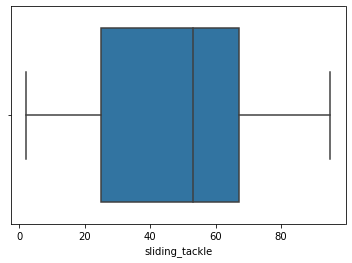

In [25]:
import seaborn as sns
sns.boxplot(dummy_df['sliding_tackle'])


In [26]:
# Since sliding tackle column does not contain any outlier , somwe can compute the missing values with help of mean
dummy_df['sliding_tackle']=dummy_df['sliding_tackle'].fillna(dummy_df['sliding_tackle'].mean())

In [27]:
dummy_df['sliding_tackle'].isna().sum()

0

C:\Users\star pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vision'>

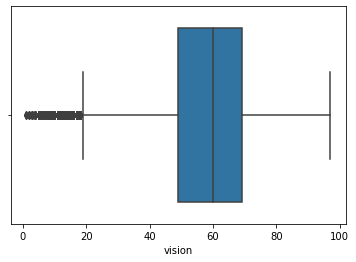

In [28]:
sns.boxplot(dummy_df['vision'])

In [29]:
# Vision contains many outliers , so we'll compute the missing values with the help of median
dummy_df['vision']=dummy_df['vision'].fillna(dummy_df['vision'].median())
dummy_df['sliding_tackle'].isna().sum()

0

C:\Users\star pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='jumping'>

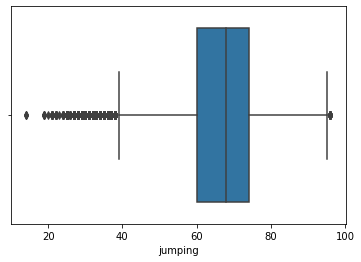

In [30]:
sns.boxplot(dummy_df['jumping'])

In [31]:
# Jumping contains many outliers , so we'll compute the missing values with the help of median
dummy_df['jumping']=dummy_df['jumping'].fillna(dummy_df['jumping'].median())
dummy_df['jumping'].isna().sum()

0

C:\Users\star pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='agility'>

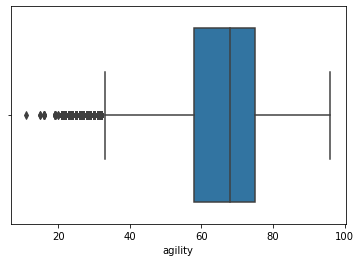

In [32]:
sns.boxplot(dummy_df['agility'])

In [33]:
# agility contains many outliers , so we'll compute the missing values with the help of median
dummy_df['agility']=dummy_df['agility'].fillna(dummy_df['agility'].median())
dummy_df['agility'].isna().sum()

0

C:\Users\star pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='volleys'>

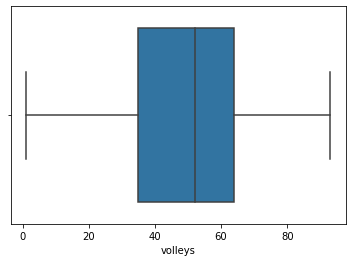

In [34]:
sns.boxplot(dummy_df['volleys'])

In [35]:
dummy_df['volleys']=dummy_df['volleys'].fillna(dummy_df['volleys'].mean())
dummy_df['volleys'].isna().sum()

0

C:\Users\star pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

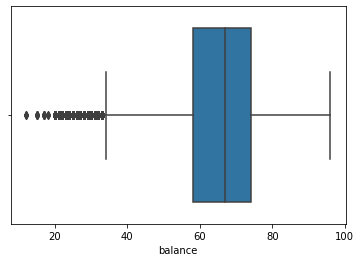

In [36]:
sns.boxplot(dummy_df['balance'])

In [37]:
# balance contains many outliers , so we'll compute the missing values with the help of median
dummy_df['balance']=dummy_df['balance'].fillna(dummy_df['balance'].median())
dummy_df['balance'].isna().sum()

0

C:\Users\star pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='curve'>

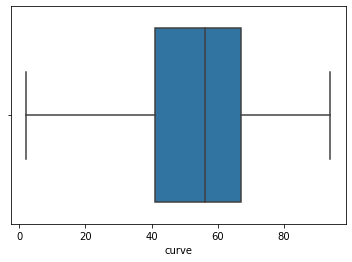

In [38]:
sns.boxplot(dummy_df['curve'])

In [39]:
# curve contains many outliers , so we'll compute the missing values with the help of median
dummy_df['curve']=dummy_df['curve'].fillna(dummy_df['curve'].mean())
dummy_df['curve'].isna().sum()

0

In [40]:
dummy_df.isna().sum()

overall_rating                836
potential                     836
crossing                      836
finishing                     836
heading_accuracy              836
short_passing                 836
volleys                         0
dribbling                     836
curve                           0
free_kick_accuracy            836
long_passing                  836
ball_control                  836
acceleration                  836
sprint_speed                  836
agility                         0
reactions                     836
balance                         0
shot_power                    836
jumping                         0
stamina                       836
strength                      836
long_shots                    836
aggression                    836
interceptions                 836
positioning                   836
vision                          0
penalties                     836
marking                       836
standing_tackle               836
sliding_tackle

In [41]:
dummy_df.dropna(inplace=True)

In [42]:
# Separating the dependent and independent columns
X=dummy_df.drop(columns=['overall_rating'])
y=dummy_df['overall_rating']

In [43]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [44]:
X_train.shape,X_test.shape

((128199, 39), (54943, 39))

In [45]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_new=scaler.fit_transform(X_train)
X_test_new=scaler.transform(X_test)

In [46]:
X_train=pd.DataFrame(X_train_new,columns=X_train.columns)

In [47]:
X_train

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_right,attacking_work_rate_low,attacking_work_rate_medium,defensive_work_rate_low,defensive_work_rate_medium
0,0.841645,-1.164714,-1.361117,1.074325,0.252547,-1.127560,-0.123446,-1.153859,-0.917124,0.553493,...,-0.515168,-0.381852,-0.325755,-0.443034,-0.140796,0.568490,-0.023374,-0.123404,-0.170682,-0.0727
1,-1.133335,-0.643107,-1.098534,0.528444,-0.311907,-1.568127,-1.024730,-0.713812,-1.365570,-0.002562,...,0.019513,-0.571212,-0.699322,-0.691865,-0.548365,-1.759047,-0.023374,-0.123404,-0.170682,-0.0727
2,-0.981414,0.226238,-1.256084,0.164524,-0.029680,-0.356568,-0.123446,-0.603801,-1.421626,-0.280589,...,-0.218123,0.312467,1.495380,0.303458,0.266773,-1.759047,-0.023374,-0.123404,-0.170682,-0.0727
3,1.753174,0.747845,0.214380,-0.199396,1.169786,0.579637,0.834168,1.046373,1.044829,1.387575,...,-0.039896,-0.571212,-0.372451,-0.131995,-0.490141,0.568490,-0.023374,-0.123404,-0.170682,-0.0727
4,-0.677571,0.516020,0.949612,-1.109197,0.675888,0.689779,0.496187,1.156384,0.540326,0.066945,...,-0.039896,-0.192493,-0.419147,-0.069788,-0.199020,0.568490,-0.023374,-0.123404,-0.170682,-0.0727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128194,0.233959,0.573976,0.214380,-0.381357,0.252547,-1.513056,0.777838,0.221286,-1.589793,-0.002562,...,-0.515168,-0.444972,-0.559234,-0.069788,-0.082572,0.568490,-0.023374,-0.123404,-0.170682,-0.0727
128195,0.233959,0.805801,1.212195,-0.563317,0.181991,0.579637,0.890499,0.386303,0.596382,-0.211082,...,0.019513,-0.697452,-0.325755,-0.131995,-0.490141,-1.759047,-0.023374,-0.123404,-0.170682,-0.0727
128196,0.841645,0.805801,0.949612,-0.078090,1.169786,1.240487,0.665178,0.936361,1.829610,1.318068,...,0.197740,0.501826,2.569383,0.490082,0.441446,0.568490,-0.023374,-0.123404,-0.170682,-0.0727
128197,-0.981414,0.226238,0.634513,-1.169851,0.181991,-0.411639,-0.067116,-0.273766,0.764550,0.414479,...,-0.218123,-0.571212,-0.605930,-0.194203,-0.257244,0.568490,-0.023374,-0.123404,-0.170682,-0.0727


In [48]:
X_test=pd.DataFrame(X_test_new,columns=X_test.columns)

In [49]:
X_test

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_right,attacking_work_rate_low,attacking_work_rate_medium,defensive_work_rate_low,defensive_work_rate_medium
0,1.297409,2.138797,0.634513,0.710404,1.099229,1.791196,1.284810,1.541425,2.053833,0.970534,...,-0.277532,0.312467,2.335904,0.303458,0.266773,-1.759047,-0.023374,-0.123404,-0.170682,-0.0727
1,0.841645,-0.643107,-1.046017,-0.381357,0.605332,-0.686993,0.101875,-0.603801,0.540326,0.762013,...,-0.218123,-0.255612,-0.372451,-0.567449,-0.606589,0.568490,-0.023374,-0.123404,-0.170682,-0.0727
2,0.841645,1.327408,0.897096,0.164524,1.310900,0.910062,1.397471,0.826349,0.708494,0.901027,...,-0.158714,0.123107,-0.932801,-0.069788,-0.257244,0.568490,-0.023374,-0.123404,-0.170682,-0.0727
3,-0.373728,0.747845,-0.205752,-0.017436,0.252547,0.689779,0.496187,0.166280,0.428215,0.066945,...,-0.277532,-0.192493,-0.279060,-0.567449,-0.082572,-1.759047,-0.023374,-0.123404,-0.170682,-0.0727
4,0.385880,1.095583,1.527294,1.013671,1.240343,1.130346,1.172150,0.661332,1.100884,1.040040,...,-0.158714,-0.129373,2.382600,-0.629657,-0.199020,0.568490,-0.023374,-0.123404,5.858862,-0.0727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54938,-0.677571,-2.207928,-1.886282,-2.625532,-2.075828,-2.008694,-2.658307,-2.198969,-1.982184,-1.670725,...,3.465237,2.900383,2.242512,3.102804,3.410879,0.568490,-0.023374,-0.123404,-0.170682,-0.0727
54939,1.449331,-0.353325,-1.151050,1.498898,0.887559,0.304283,0.158205,-0.493789,-0.917124,0.762013,...,-0.218123,-0.508092,-0.465843,-0.256411,-0.082572,0.568490,-0.023374,-0.123404,-0.170682,-0.0727
54940,0.233959,0.631932,-0.048203,0.467791,0.323104,-0.466710,0.496187,-0.768818,-0.524733,0.066945,...,-0.396350,-0.697452,-0.699322,-0.443034,-0.548365,0.568490,-0.023374,-0.123404,-0.170682,-0.0727
54941,-1.133335,0.052369,0.266897,-0.260050,0.323104,0.414424,0.270866,-0.273766,0.764550,0.066945,...,-0.039896,-0.571212,-0.559234,-0.256411,-0.548365,0.568490,-0.023374,-0.123404,-0.170682,-0.0727


#### Training models

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor=LinearRegression()
regressor.fit(X_train,y_train)
from sklearn.model_selection import cross_val_score
mse=cross_val_score(regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
np.mean(mse)
prediction_linear=regressor.predict(X_test)
r2_score(y_test,prediction_linear)

0.8429277236674049

In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[1e-15,1e-3,1e-1,1,5,10,20,30,40,50,60,100,150,200,300]}
ridge_regressor=GridSearchCV(ridge,parameters,cv=5,scoring='neg_mean_squared_error',verbose=1)
ridge_regressor.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 0.001, 0.1, 1, 5, 10, 20, 30, 40, 50,
                                   60, 100, 150, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [52]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-7.886144539358256


In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-5,1e-1,1,5,10,20,30,50,100,150,200]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

C:\Users\star pc\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.429e+05, tolerance: 5.083e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\star pc\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.504e+05, tolerance: 5.063e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\star pc\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.627e+05, to

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.1, 1, 5, 10, 20, 30,
                                   50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [54]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-05}
-7.886147385747741


In [55]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='mse')
regressor.fit(X_train,y_train)
DT_predict=regressor.predict((X_test))
r_square=r2_score(y_test,DT_predict)
r_square

C:\Users\star pc\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


0.9601252149887308

In [56]:
from sklearn.ensemble import RandomForestRegressor
RFreg=RandomForestRegressor(n_estimators=10,random_state=0)
RFreg.fit(X_train,y_train)
RF_predict=RFreg.predict((X_test))
r_square=r2_score(y_test,RF_predict)
r_square

0.9779251877889532